In [14]:
#@title Librerias
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
from scipy.interpolate import CubicHermiteSpline
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request

# Actividad 05: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Juan Jose Bustamante Guiral
*Métodos computacionales 2025-I*

---

# 1
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.

- Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

*Nota: recuerde que los indices en python inician en 0, luego si tenemos $n+1$ datos el polinomio es de orden $n$*

Polinomio de Lagrange:          2
-0.4053 x + 1.273 x
Error máximo entre sin(x) y el polinomio de Lagrange: 0.05600671977855842


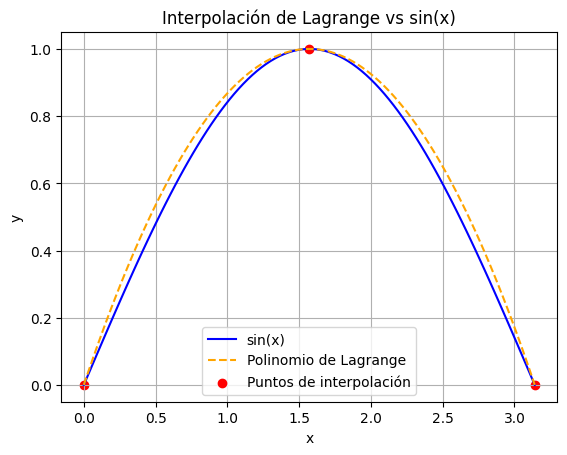

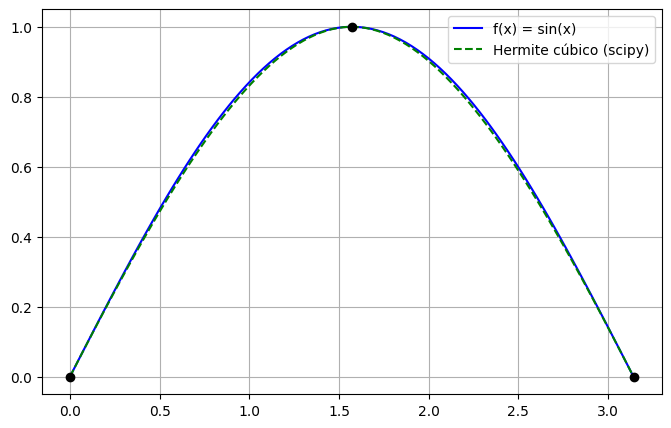

In [6]:
x_inter = [0, np.pi/2, np.pi]
y_inter = [np.sin(xi) for xi in x_inter]

# Polinomio de Lagrange
P = lagrange(x_inter, y_inter)
print(f'Polinomio de Lagrange: {P}')

# Evaluar el polinomio y sin(x) en muchos puntos
x_val = np.linspace(0, np.pi, 100)
f_val = np.sin(x_val)
P_val = P(x_val)

# Calcular error absoluto y máximo
error_vals = np.abs(f_val - P_val)
error_max = np.max(error_vals)
print(f'Error máximo entre sin(x) y el polinomio de Lagrange: {error_max}')

plt.plot(x_val, f_val, label='sin(x)', color='blue')
plt.plot(x_val, P_val, label='Polinomio de Lagrange', linestyle='--', color='orange')
plt.scatter(x_inter, y_inter, color='red', label='Puntos de interpolación')
plt.title("Interpolación de Lagrange vs sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

def f(x):
    return np.sin(x)

def df(x):
    return np.cos(x)

dy_val = df(x_inter)

hermite_spline = CubicHermiteSpline(x_inter, y_inter, dy_val)

x_f = np.linspace(0, np.pi, 100)
y_final = f(x_f)
y_hermite = hermite_spline(x_f)

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(x_f, y_final, label="f(x) = sin(x)", color='blue')
plt.plot(x_f, y_hermite, '--', label="Hermite cúbico (scipy)", color='green')
plt.scatter(x_inter, y_inter, color='black', zorder=5)
plt.grid()
plt.legend()
plt.show()

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función original.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el máximo   error asociado a cada uno de ellos. ¿Cuál será el mejor?

Errores máximos absolutos:
Lagrange: 38.1972
Cubic Spline: 5.4302
Hermite: 3.9009


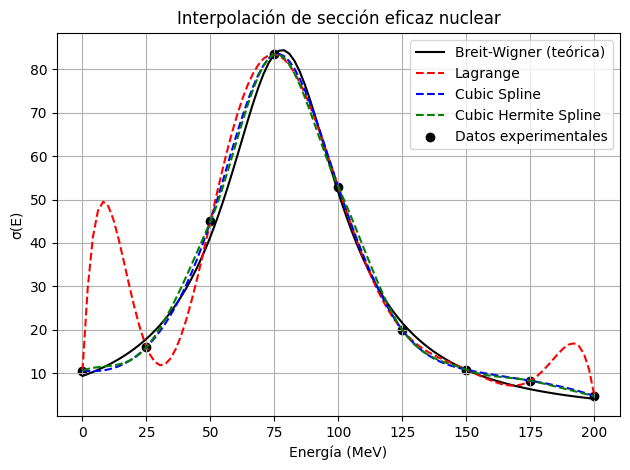

In [8]:
Energia = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])


# Fórmula de Breit-Wigner
Er = 78
Gamma = 55

E_ref = 75
sigma = 83.5
sigma_0 = sigma * ((E_ref - Er)**2 + (Gamma**2 / 4))

def breit_wigner(E):
    return sigma_0 / ((E - Er)**2 + (Gamma**2 / 4))

lagrange_polinomio = lagrange(Energia, sigma_exp)

def derivadas(x, y):
    dy = np.zeros_like(y)
    n = len(x)
    for i in range(n):
        if i == 0:  # Hacia adelante
            dy[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
        elif i == n - 1:  # Hacia atrás
            dy[i] = (y[i] - y[i-1]) / (x[i] - x[i-1])
        else:  # Centradas
            dy[i] = (y[i+1] - y[i-1]) / (x[i+1] - x[i-1])
    return dy

deriv = derivadas(Energia, sigma_exp)


cubic_spline = CubicSpline(Energia, sigma_exp)

hermite_spline = CubicHermiteSpline(Energia, sigma_exp, deriv)

Energias = np.linspace(0, 200, 100)
y_formula = breit_wigner(Energias)
y_lagrange = lagrange_polinomio(Energias)
y_cubic = cubic_spline(Energias)
y_hermite = hermite_spline(Energias)

# Errores
err_lagrange = np.max(np.abs(y_formula - y_lagrange))
err_cubic = np.max(np.abs(y_formula - y_cubic))
err_hermite = np.max(np.abs(y_formula - y_hermite))

print('Errores máximos absolutos:')
print(f'Lagrange: {err_lagrange:.4f}')
print(f'Cubic Spline: {err_cubic:.4f}')
print(f'Hermite: {err_hermite:.4f}')

plt.plot(Energias, y_formula, label='Breit-Wigner (teórica)', color='black')
plt.plot(Energias, y_lagrange, '--', label='Lagrange', color='red')
plt.plot(Energias, y_cubic, '--', label='Cubic Spline', color='blue')
plt.plot(Energias, y_hermite, '--', label='Cubic Hermite Spline', color='green')
plt.scatter(Energia, sigma_exp, color='black', label='Datos experimentales')

plt.title("Interpolación de sección eficaz nuclear")
plt.xlabel("Energía (MeV)")
plt.ylabel("σ(E)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

* Usando los datos del numeral anterior ahora usando el método `CubicSpline` realiza la interpolación y concluya.

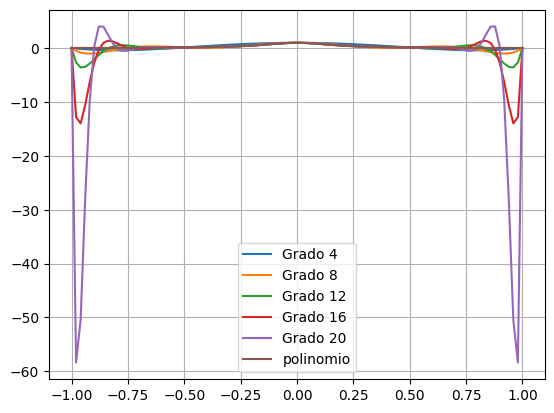

In [18]:
def f(x):
    return 1 / (1 + 25 * (x**2))
x = np.linspace(-1,1, 100)

def df(x):
    return 50 * x * (1 + 25 * x**2)**(-2)
grado_de_interpolacion = (4,8,12,16,20)

fx = f(x)
for n in grado_de_interpolacion:
    x_n = np.linspace(-1, 1, n+1)
    y_n = f(x_n)
    Pn = lagrange(x_n, y_n)
    plt.plot(x, Pn(x), label=f'Grado {n}')

plt.plot(x, f(x), label = 'polinomio')
plt.grid()
plt.legend()



Cota del error para n=4 en x=0.5: 0


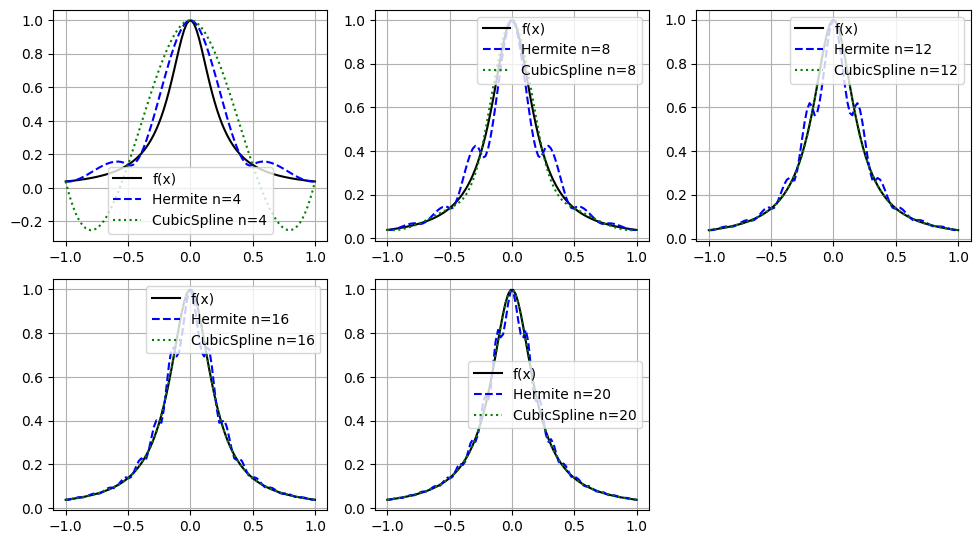

In [22]:
xs = sp.Symbol('x')

f_sym = 1 / (1 + 25 * xs**2)
f_deriv = sp.diff(f_sym, xs, 5)
f_derivada = f_deriv.subs(xs, 0.5)

x_n_4 = np.linspace(-1, 1, 5)
omega = 1
for xi in x_n_4:
    omega *= (0.5 - xi)
error = abs(f_derivada * omega / math.factorial(5))
print(f'Cota del error para n=4 en x=0.5: {error}')
plt.figure(figsize=(10, 8))
for i, n in enumerate(grado_de_interpolacion):
    x_n1 = np.linspace(-1, 1, n+1)
    y_n2 = f(x_n1)
    dy_n = df(x_n1)

    hermite_interp = CubicHermiteSpline(x_n1, y_n2, dy_n)
    y_hermite = hermite_interp(x)

    spline_interp = CubicSpline(x_n1, y_n2)
    y_spline = spline_interp(x)

    plt.subplot(3, 3, i+1)
    plt.plot(x, fx, label='f(x)', color='black')
    plt.plot(x, y_hermite, '--', label=f'Hermite n={n}', color='blue')
    plt.plot(x, y_spline, ':', label=f'CubicSpline n={n}', color='green')
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()


# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato y realice una interpolación lineal entre los mismos.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

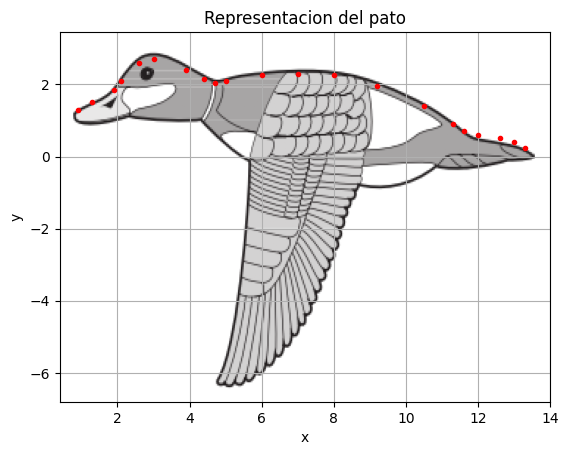

In [ ]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

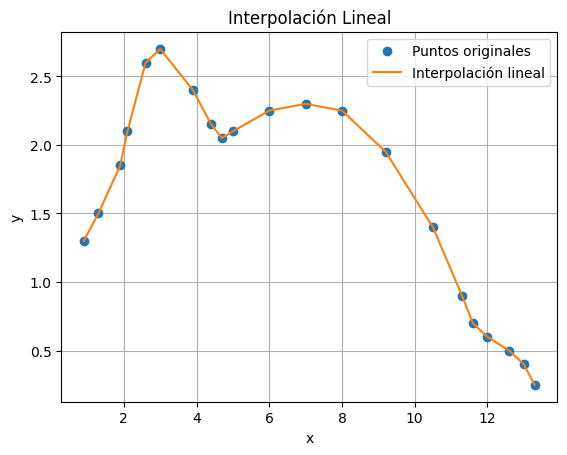

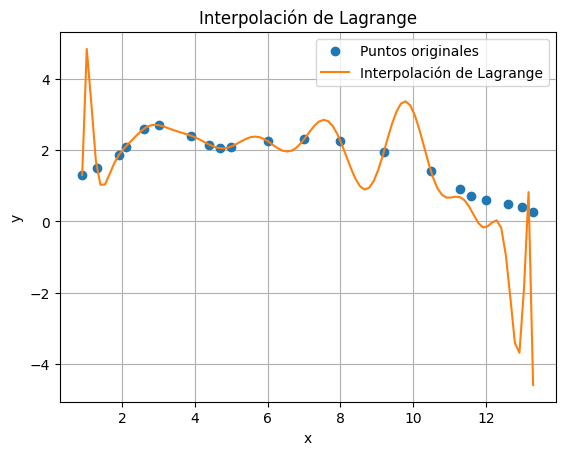

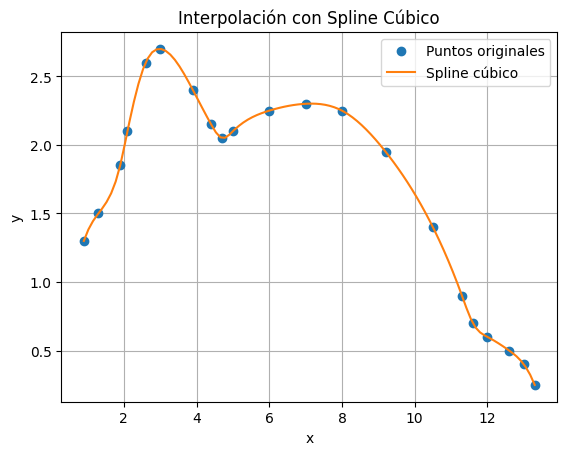

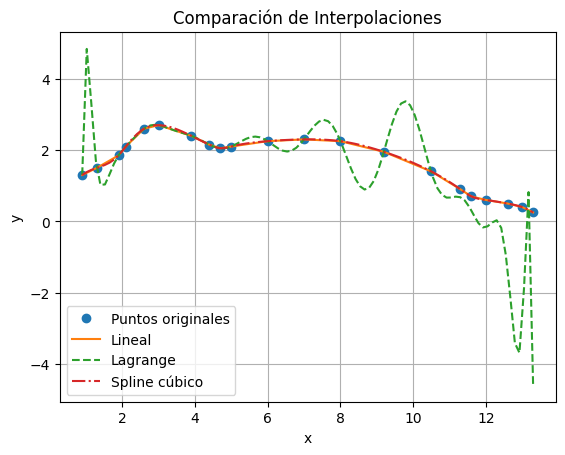

In [ ]:
# Interpolación lineal
plt.plot(xp, yp, 'o', label='Puntos originales')
plt.plot(xp, yp, '-', label='Interpolación lineal')
plt.title('Interpolación Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Interpolación de Lagrange
polinomio_lagrange = lagrange(xp, yp)
x_lagrange = np.linspace(min(xp), max(xp), 100)
f_lagrange = polinomio_lagrange(x_lagrange)


plt.plot(xp, yp, 'o', label='Puntos originales')
plt.plot(x_lagrange, f_lagrange, '-', label='Interpolación de Lagrange')
plt.title('Interpolación de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# nterpolación con splines cúbicos
cs = CubicSpline(xp, yp)
x_spline = np.linspace(min(xp), max(xp), 100)
f_spline = cs(x_spline)


plt.plot(xp, yp, 'o', label='Puntos originales')
plt.plot(x_spline, f_spline, '-', label='Spline cúbico')
plt.title('Interpolación con Spline Cúbico')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Comparar resultados
plt.plot(xp, yp, 'o', label='Puntos originales')
plt.plot(xp, yp, '-', label='Lineal')
plt.plot(x_lagrange, f_lagrange, '--', label='Lagrange')
plt.plot(x_spline, f_spline, '-.', label='Spline cúbico')
plt.title('Comparación de Interpolaciones')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


# 5

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, para esto escriba la matriz asociada y encuentre los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

In [ ]:
# Datos
x = np.array([-1, 0, 1, 2])
y = np.array([5, 3, 3, 4])

# Crear el spline cúbico
cs = CubicSpline(x, y)

# Evaluar en x = 1.5
valor = cs(1.5)

# Coeficientes
coeficientes = cs.c

# Mostrar resultados
print('Valor de S(1.5):', valor)
print('Coeficientes de los polinomios:')
for i in range(3):
    print(f'S_{i}(x): {coeficientes[3,i]:+.4f}(x - {x[i]})**3 {coeficientes[2,i]:+.4f}(x - {x[i]})**2 {coeficientes[1,i]:+.4f}(x - {x[i]}) {coeficientes[0,i]:+.4f}')


Valor de S(1.5): 3.4375
Coeficientes de los polinomios:
S_0(x): +5.0000(x - -1)**3 -3.3333(x - -1)**2 +1.5000(x - -1) -0.1667
S_1(x): +3.0000(x - 0)**3 -0.8333(x - 0)**2 +1.0000(x - 0) -0.1667
S_2(x): +3.0000(x - 1)**3 +0.6667(x - 1)**2 +0.5000(x - 1) -0.1667
